In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import time

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [3]:
cred_trans = pd.read_csv('data/ibm_card_data_unlabelled.csv')
cred_trans.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?
0,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN
1,0,0,2002,9,8,13:48,$76.57,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN
2,0,0,2002,9,10,06:22,$102.18,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN
3,0,0,2002,9,12,06:21,$122.10,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Insufficient Balance
4,0,0,2002,9,23,06:46,$35.28,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,NaN


In [4]:
## Let's remove the white space in the columns and replace them with underscore
cred_trans.columns = [x.replace(" ", "_").replace("?", "") for x in cred_trans.columns]
cred_trans.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Amount', 'Use_Chip',
       'Merchant_Name', 'Merchant_City', 'Merchant_State', 'Zip', 'MCC',
       'Errors'],
      dtype='object')

In [5]:
## Iterating through columns to find out which columns contain nulls via list comprehension
[features for features in cred_trans.columns if cred_trans[features].isnull().sum()>0]
## Three columns have nulls

['Merchant_State', 'Zip', 'Errors']

In [6]:
## Let's see how many nulls there are in the respective columns
cred_trans.isnull().sum()
## We also have missing values in Errors which essentially means that there were no errors.

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  0
Use_Chip                0
Merchant_Name           0
Merchant_City           0
Merchant_State     271897
Zip                287575
MCC                     0
Errors            2396823
dtype: int64

Range of Years

In [7]:
cred_trans.Year.sort_values().min(),cred_trans.Year.sort_values().max()

(1991, 2020)

In [8]:
## Let's see how many different type of errors there are.
cred_trans['Errors'].value_counts()
## There are 22 different types of errors (excluding the NaNs)

Insufficient Balance                                   24187
Bad PIN                                                 5901
Technical Glitch                                        4794
Bad Card Number                                         1272
Bad Expiration                                          1031
Bad CVV                                                 1024
Bad Zipcode                                              211
Bad PIN,Insufficient Balance                              53
Insufficient Balance,Technical Glitch                     48
Bad Card Number,Insufficient Balance                      16
Bad PIN,Technical Glitch                                  11
Bad CVV,Insufficient Balance                              10
Bad Card Number,Bad CVV                                    7
Bad Expiration,Insufficient Balance                        5
Bad Expiration,Bad CVV                                     5
Bad Card Number,Bad Expiration                             5
Bad CVV,Technical Glitch

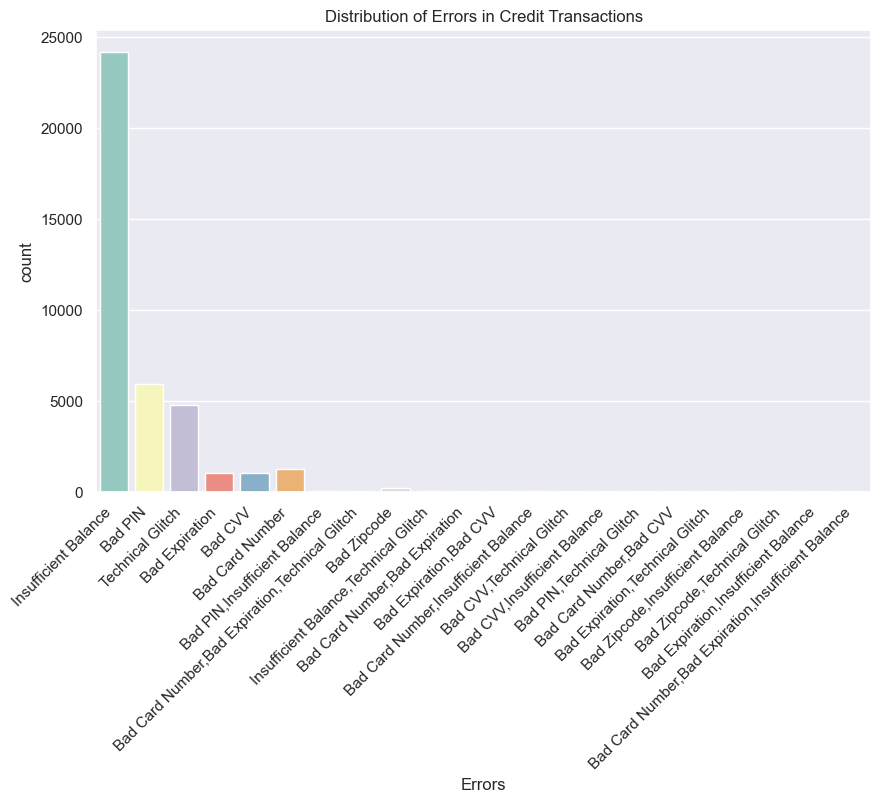

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Errors", data=cred_trans, palette="Set3")
plt.title("Distribution of Errors in Credit Transactions")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


In [10]:
cred_trans.Use_Chip.unique()

## There are 3 different types of transactions being done: 1) Swipe 2) Online 3) Chip
## We could probably map these numerically

array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

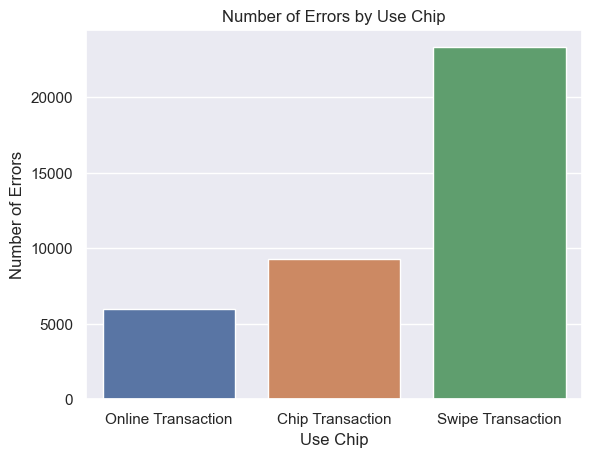

In [12]:
errs_by_chip = cred_trans.groupby('Use_Chip')[['Errors']].count().sort_values('Errors', ascending = True)
sns.barplot(x=errs_by_chip.index, y='Errors', data=errs_by_chip)
plt.title("Number of Errors by Use Chip")
plt.xlabel("Use Chip")
plt.ylabel("Number of Errors")
plt.show()